<a href="https://colab.research.google.com/github/tinaghimire/data-mining/blob/main/Lab-3_Naive_Bayes/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fuse/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


Pclass---  Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd

SibSp---- No. of siblings / spouses aboard the Titanic

Parch --- No. of parents / children aboard the Titanic

Fare ---- Passenger fare

Embarked -- Embarked implies where the traveler mounted from. There are three possible values for Embark —

S - Southampton,
C - Cherbourg, and
Q - Queenstown

In [ ]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch','Ticket', 'Cabin', 'Embarked'], axis = 1)
df

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [ ]:
df.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
count = df['Survived'].value_counts()
count = pd.DataFrame(count)
count

,count
Survived,
0,549
1,342


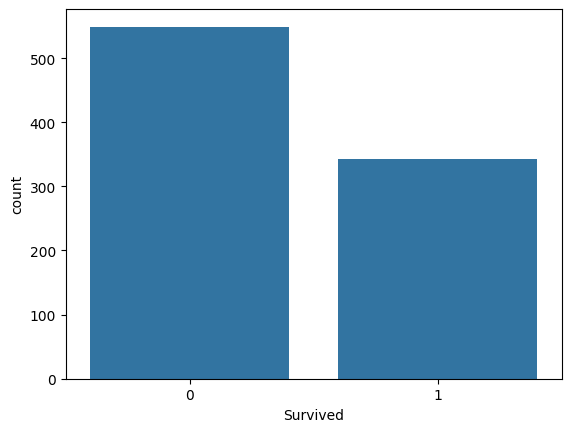

In [ ]:
sns.countplot(data=df, x='Survived')
plt.show()

In [ ]:
count = df.groupby('Gender')['Survived'].value_counts()
count / len(df) * 100

Gender  Survived
female  1           26.150393
        0            9.090909
male    0           52.525253
        1           12.233446
Name: count, dtype: float64

In [ ]:
count = pd.pivot_table(df, values='Survived', index='Gender', columns='Pclass', aggfunc="mean")
count

Pclass,1,2,3
Gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
import matplotlib.pyplot as plt

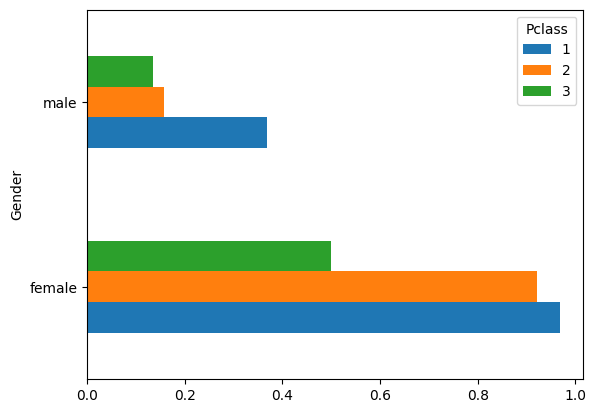

In [ ]:
count.plot.barh()
plt.show()

In [ ]:
df['Age'] = pd.cut(df['Age'], bins=5)
df

TypeError: putmask: first argument must be an array

In [ ]:
count = pd.pivot_table(df, values='Survived', index=['Gender', 'Pclass'] , columns='Age', aggfunc="mean", fill_value=0)
count

Age            0.42   0.67   0.75   0.83   0.92      1.00   2.00   3.00   \
Gender Pclass                                                              
female 1           0      0      0      0      0  0.000000   0.00      0   
       2           0      0      0      0      0  0.000000   1.00      1   
       3           0      0      1      0      0  1.000000   0.25      0   
male   1           0      0      0      0      1  0.000000   0.00      0   
       2           0      1      0      1      0  1.000000   1.00      1   
       3           1      0      0      0      0  0.333333   0.00      1   

Age            4.00   5.00   ...  62.00  63.00  64.00  65.00  66.00  70.00  \
Gender Pclass                ...                                             
female 1        0.00      0  ...      1      1      0      0      0      0   
       2        1.00      1  ...      0      0      0      0      0      0   
       3        1.00      1  ...      0      1      0      0      0      0   
male   1        1.00      0  ...      0      0      0      0      0      0   
       2        0.00      0  ...      1      0      0      0      0      0   
       3        0.25      0  ...      0      0      0      0      0      0   

Age            70.50  71.00  74.00  80.00  
Gender Pclass                              
female 1           0      0      0      0  
       2           0      0      0      0  
       3           0      0      0      0  
male   1           0      0      0      1  
       2           0      0      0      0  
       3           0      0      0      0  

[6 rows x 88 columns]

In [ ]:
count = count.stack('Age').reset_index()
count

,Gender,Pclass,Age,0
0,female,1,"(0.34, 16.336]",0.833333
1,female,1,"(16.336, 32.252]",0.968750
2,female,1,"(32.252, 48.168]",1.000000
3,female,1,"(48.168, 64.084]",0.941176
4,female,1,"(64.084, 80.0]",0.000000
5,female,2,"(0.34, 16.336]",1.000000
6,female,2,"(16.336, 32.252]",0.916667
7,female,2,"(32.252, 48.168]",0.909091
8,female,2,"(48.168, 64.084]",0.833333
9,female,2,"(64.084, 80.0]",0.000000


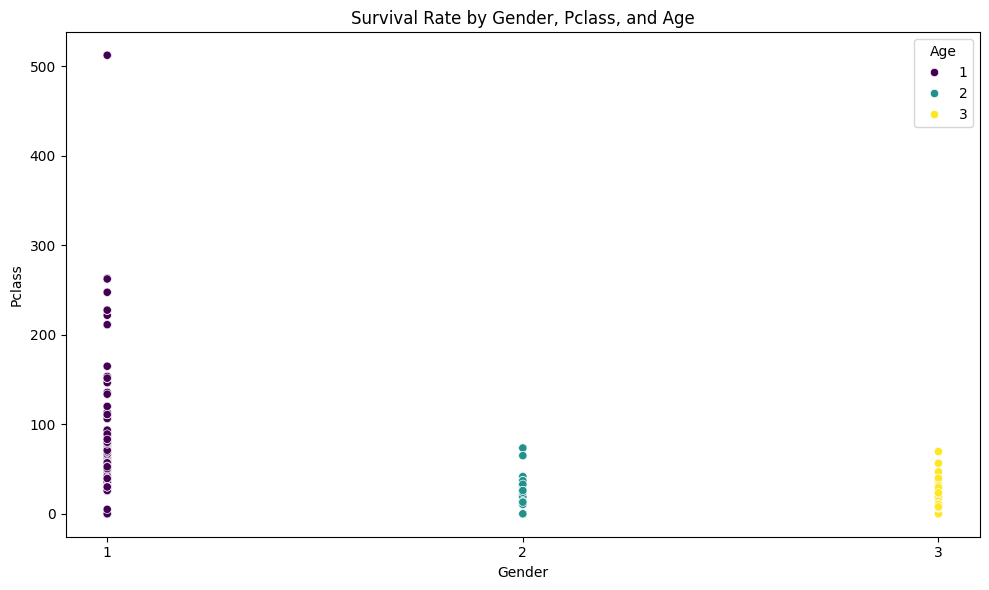

In [ ]:
count.columns = ['Gender', 'Pclass', 'Age', 'Survival Rate']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pclass', y='Fare', hue='Pclass', palette='viridis', sizes=(50, 200))
plt.legend(title='Age')
plt.title('Survival Rate by Gender, Pclass, and Age')
plt.xlabel('Gender')
plt.ylabel('Pclass')
plt.xticks(range(1, 4))
plt.tight_layout()
plt.show()

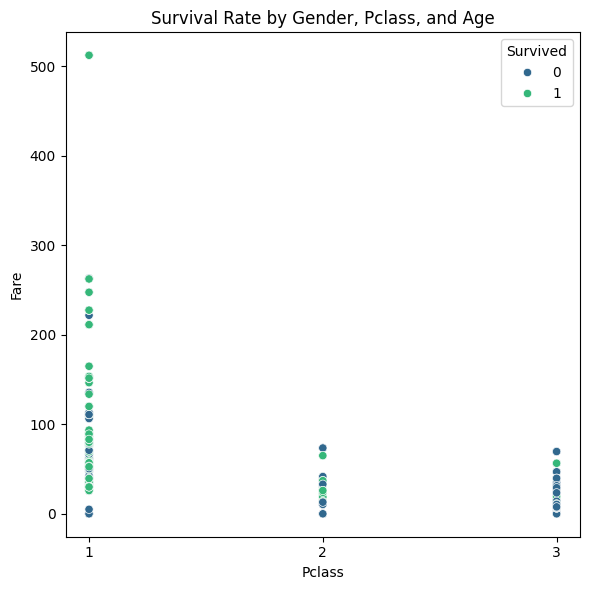

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Pclass', y='Fare', hue='Survived', palette='viridis')
plt.legend(title='Survived')
plt.title('Survival Rate by Gender, Pclass, and Age')
plt.ylabel('Fare')
plt.xlabel('Pclass')
plt.xticks(range(1, 4))
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fuse/titanic.csv")
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch','Ticket', 'Cabin', 'Embarked'], axis = 1)

X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
X.head()

,Pclass,Gender,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [ ]:
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])
X.head()

,Pclass,Gender,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [ ]:
X.describe()

,Pclass,Gender,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,2.308642,0.647587,29.699118,32.204208
std,0.836071,0.477990,14.526497,49.693429
min,1.000000,0.000000,0.420000,0.000000
25%,2.000000,0.000000,20.125000,7.910400
50%,3.000000,1.000000,28.000000,14.454200
75%,3.000000,1.000000,38.000000,31.000000
max,3.000000,1.000000,80.000000,512.329200


In [ ]:
X.isnull().sum()

Pclass      0
Gender      0
Age       177
Fare        0
dtype: int64

In [ ]:
round(np.mean(X['Age']))

30

In [ ]:
X['Age'] = X['Age'].fillna(round(np.mean(X['Age'])))
X['Age'] = X['Age'].astype(int)
X.head()

,Pclass,Gender,Age,Fare
0,3,1,22,7.2500
1,1,0,38,71.2833
2,3,0,26,7.9250
3,1,0,35,53.1000
4,3,1,35,8.0500


In [ ]:
X['Age'].value_counts()

Age
30    204
24     31
22     27
28     27
18     26
     ... 
12      1
53      1
80      1
66      1
74      1
Name: count, Length: 71, dtype: int64

<Axes: >

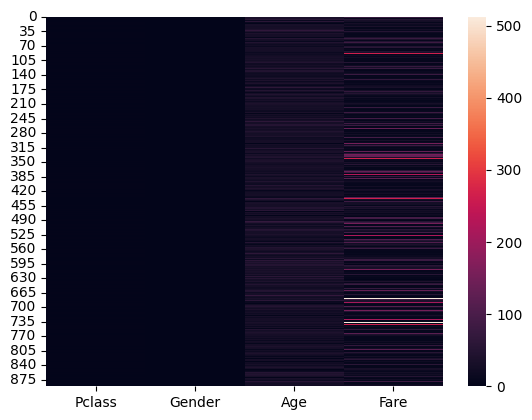

In [ ]:
sns.heatmap(X)

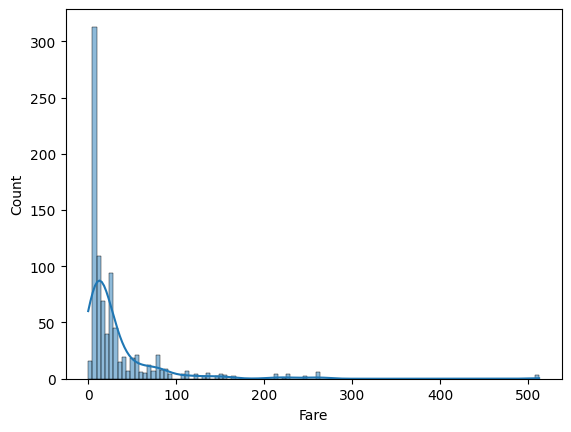

In [ ]:
sns.histplot(X['Fare'], kde=True)
plt.show()

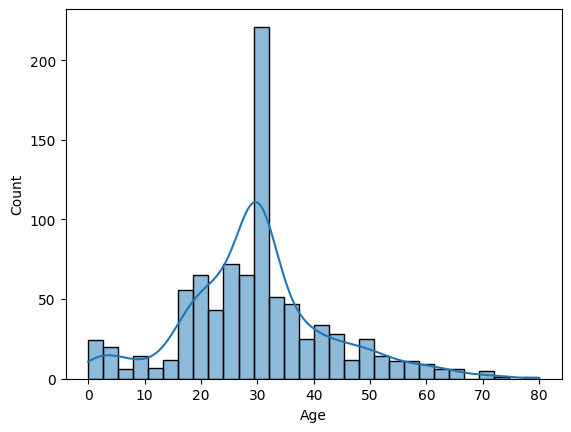

In [ ]:
sns.histplot(X['Age'], kde=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test[0:10])

In [ ]:
y_prob = gnb.predict_proba(X_test[0:10])
y_prob

array([[0.96855042, 0.03144958],
       [0.93429182, 0.06570818],
       [0.96232568, 0.03767432],
       [0.13854272, 0.86145728],
       [0.35185431, 0.64814569],
       [0.02102606, 0.97897394],
       [0.43033628, 0.56966372],
       [0.95876527, 0.04123473],
       [0.36366514, 0.63633486],
       [0.07464181, 0.92535819]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, gnb.predict(X_test))

array([[83, 22],
       [21, 53]])

Text(50.722222222222214, 0.5, 'True Labels')

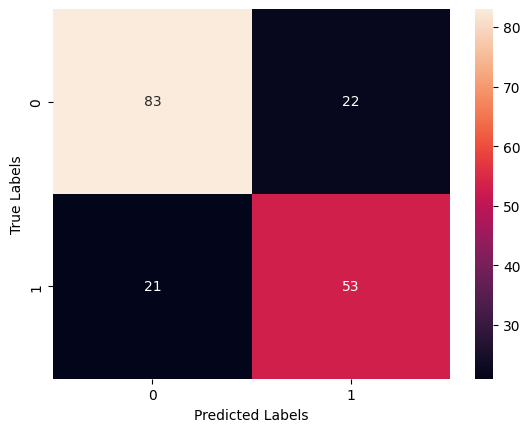

In [ ]:
# Confusion matrix
con_matrix = confusion_matrix(y_test, gnb.predict(X_test))
ax = sns.heatmap(con_matrix, annot=True, fmt='d', xticklabels = y.unique(), yticklabels = y.unique())
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [ ]:
class_report = classification_report(y_test, gnb.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [ ]:
from sklearn.naive_bayes import CategoricalNB

# Categorical Naive Bayes

In [ ]:
X['Age'] = pd.cut(X['Age'], bins=5)
X['Fare'] = pd.cut(X['Fare'], bins=5)
X.head()

,Pclass,Gender,Age,Fare
0,3,1,"(16.0, 32.0]","(-0.512, 102.466]"
1,1,0,"(32.0, 48.0]","(-0.512, 102.466]"
2,3,0,"(16.0, 32.0]","(-0.512, 102.466]"
3,1,0,"(32.0, 48.0]","(-0.512, 102.466]"
4,3,1,"(32.0, 48.0]","(-0.512, 102.466]"


In [ ]:
gnb = CategoricalNB()
gnb.fit(X_train, y_train)

CategoricalNB()

In [ ]:
y_pred = gnb.predict(X_test[0:10])
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
y_prob = gnb.predict_proba(X_test[0:10])
y_prob

array([[0.92296804, 0.07703196],
       [0.7659138 , 0.2340862 ],
       [0.97102116, 0.02897884],
       [0.15890786, 0.84109214],
       [0.3294838 , 0.6705162 ],
       [0.15544226, 0.84455774],
       [0.74779838, 0.25220162],
       [0.86547429, 0.13452571],
       [0.66556554, 0.33443446],
       [0.14435869, 0.85564131]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, gnb.predict(X_test))

array([[88, 17],
       [26, 48]])

Text(50.722222222222214, 0.5, 'True Labels')

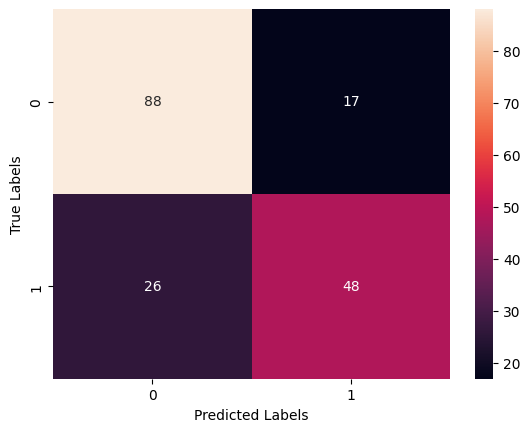

In [ ]:
# Confusion matrix
con_matrix = confusion_matrix(y_test, gnb.predict(X_test))
ax = sns.heatmap(con_matrix, annot=True, fmt='d', xticklabels = y.unique(), yticklabels = y.unique())
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [ ]:
class_report = classification_report(y_test, gnb.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       105
           1       0.74      0.65      0.69        74

    accuracy                           0.76       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179

